# Aim

See how well `observer.py` works when I adjust it. This notebook should be deletable soon.

In [1]:
%load_ext autoreload
%autoreload 2

In [28]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal, optimize, stats

import sys
sys.path.append("..")
from dev import observer

In [18]:
psd = np.load("../data/sims/pgram_atm_1_vib_3.npy")

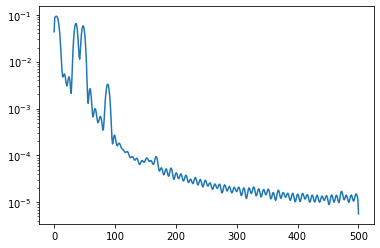

In [21]:
plt.semilogy(psd)

In [20]:
observer.vibe_fit_freq(observer.noise_filter(psd), 3)

(array([[3.60000000e+01, 1.15600097e-04],
        [4.80000000e+01, 1.12191339e-04],
        [1.70000000e+01, 1.03735352e-04]]),
 array([6.02775904e-03, 4.77201608e-03, 4.28104401e-05]))

In [32]:
locs, peaks = signal.find_peaks(psd, height=1e-4)
peaks = peaks['peak_heights']

In [35]:
peaks

array([0.09329642, 0.0054879 , 0.00472971, 0.06550698, 0.05786674,
       0.00265903, 0.00099558, 0.00068187, 0.0033151 , 0.00027166,
       0.00018273, 0.00012107])

In [36]:
locs

array([  4,  17,  24,  36,  48,  59,  67,  76,  88,  99, 107, 120])

In [46]:
logf = np.log(np.arange(len(psd))+1)
linres = stats.linregress(logf, np.log(psd))
psdfit = np.exp(linres.slope * logf + linres.intercept)
psdres = np.maximum(1e-7, psd - psdfit)

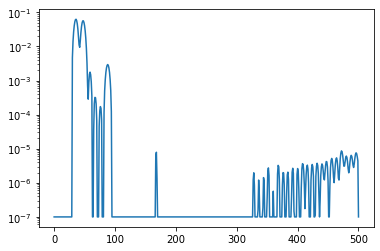

In [47]:
plt.semilogy(psdres)

In [50]:
locs, peaks = signal.find_peaks(psdres, height=1e-4)

In [53]:
locs

array([36, 48, 59, 67, 76, 88])

In [52]:
peaks['peak_heights']

array([0.06284473, 0.05645392, 0.00176429, 0.00032091, 0.00017214,
       0.00294743])